# Deep Learning with Python - Ch. 4 Notes

**Underfitting vs. Overfitting...the balance**

Ask yourself, how much memorization is my model doing? This can be answered by comparing the number of layers & units per layer to the number of training samples & number of features. Think about how large the representation space is with the current architecture.

To get the right balance - need to have a balance between not enough memorization (too few units to be able to have an effective compressed representation) and too much memorization (so much that it's essentially just memorizing the input data, and won't be able to generalize).

## Determining the size of a network

Start small (in number of layers and parameters), then continue adding more layers until you see a diminishing return, in regards to data validation loss.

Let's do it again with the movie classification dataset - this time starting smaller.

In [1]:
import matplotlib.pyplot as plt

from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/ewilens/anaconda3/envs/metis/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/ewilens/anaconda3/envs/metis/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different leng

In [2]:
from keras import models, layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [3]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 42ms/step - loss: 0.5509 - acc: 0.7494 - val_loss: 0.3470 - val_acc: 0.8823
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2811 - acc: 0.9117 - val_loss: 0.2904 - val_acc: 0.8880
Epoch 3/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2068 - acc: 0.9304 - val_loss: 0.2813 - val_acc: 0.8895
Epoch 4/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1707 - acc: 0.9422 - val_loss: 0.2881 - val_acc: 0.8865
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1448 - acc: 0.9512 - val_loss: 0.3041 - val_acc: 0.8826
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1251 - acc: 0.9595 - val_loss: 0.3262 - val_acc: 0.8774
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1096 - acc: 0.9650 - val_loss: 0.3467 - val_acc: 0.8739
Epoch 8/20
49/49 [==============================] - 1s 15ms/step - loss: 0.0931 - a

In [4]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']

# Weight regularization

## L1 and L2 Regularizers

Simple models are better! Add to the loss function a **cost** associated with having large weights (high complexity). This results in more normalized weights that will help prevent overfitting.

***L1 regularization (LASSO)***: Cost is added proportional to the **absolute value** of the weight coefficients

***L2 regularization (RIDGE)***: Cost is added proportional to the **square value** of the weight coefficients. L2 is aka **weight decay**.

These are also referred to as the "L1 norm" or "L2 norm" of the data.

## Interpreting results of regularized model
   
**The weight penalties are only applied during training. So, the cost function of train/validation steps will be much higher than that of the test set (in theory).**

In [5]:
from keras import models, layers, regularizers

l2_model = models.Sequential()

l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(10000,))) # input layer

l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu')) # hidden layer

l2_model.add(layers.Dense(1, activation='sigmoid')) # output layer

In [6]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of the network. Note that because this penalty is _only added at training time_, the loss for this network will be much higher at training than at test time.

Here's the impact of our L2 regularization penalty:

In [7]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 54ms/step - loss: 0.5913 - acc: 0.7425 - val_loss: 0.3848 - val_acc: 0.8814
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 0.3290 - acc: 0.9048 - val_loss: 0.3393 - val_acc: 0.8871
Epoch 3/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2683 - acc: 0.9234 - val_loss: 0.3349 - val_acc: 0.8846
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2488 - acc: 0.9316 - val_loss: 0.3320 - val_acc: 0.8858
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2267 - acc: 0.9394 - val_loss: 0.3660 - val_acc: 0.8720
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2223 - acc: 0.9389 - val_loss: 0.3769 - val_acc: 0.8702
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2157 - acc: 0.9435 - val_loss: 0.3581 - val_acc: 0.8778
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2041 - a

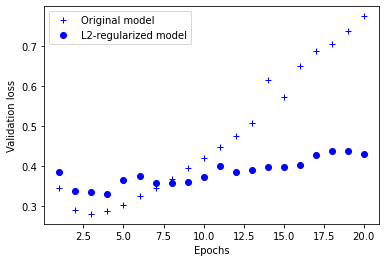

In [8]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## Alternatives to L2

L1, or L1_L2 (both at the same time)

L1 regularization: `regularizers.l1(0.001)`

L1 and L2 regularization at the same time: `regularizers.l1_l2(l1=0.001, l2=0.001)`

## Dropout Layers

Most common method of regularization (in neural networks) - zero out random outputs of each layer 

In [11]:
dpt_model = models.Sequential()

dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # input layer
dpt_model.add(layers.Dropout(0.5)) # dropout random outputs of above layer

dpt_model.add(layers.Dense(16, activation='relu')) # hidden layer
dpt_model.add(layers.Dropout(0.5)) # dropout random outputs of above layer

dpt_model.add(layers.Dense(1, activation='sigmoid')) # output layer

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [12]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 45ms/step - loss: 0.6446 - acc: 0.6092 - val_loss: 0.4648 - val_acc: 0.8552
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 0.4759 - acc: 0.8003 - val_loss: 0.3767 - val_acc: 0.8674
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3819 - acc: 0.8612 - val_loss: 0.3148 - val_acc: 0.8822
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3197 - acc: 0.8968 - val_loss: 0.3022 - val_acc: 0.8767
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2833 - acc: 0.9171 - val_loss: 0.2923 - val_acc: 0.8863
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2459 - acc: 0.9267 - val_loss: 0.2988 - val_acc: 0.8838
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2190 - acc: 0.9362 - val_loss: 0.3066 - val_acc: 0.8809
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1989 - a

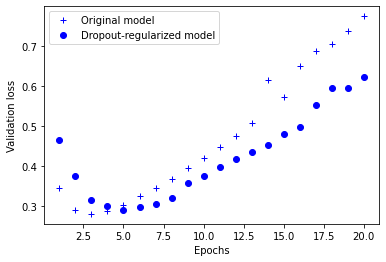

In [13]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()